
# Notes

## Impedance matching and Single-Gain Stage Characterization
- All sweeps are performed with 0.5 GHz - 1.5 GHz range
- Calibration is performed taking into account 2 coax cables used for measurement


In [2]:
import skrf as rf
import matplotlib.pyplot as plt

def show_plot(filename, title_through="S21", title_ret = "S11"):
	ntwk = rf.Network(filename)

	# Convert frequency from Hz to GHz for plotting
	freq_ghz = ntwk.f / 1e9

	# Create a figure and 2 side-by-side subplots
	fig, (ax_s21, ax_s11) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

	# --------------------------
	# Subplot 1: S21
	# --------------------------
	ax_s21_phase = ax_s21.twinx()  # second y-axis for phase

	# Plot S21 magnitude (dB) on the left y-axis
	mag_s21 = ntwk.s21.s_db.flatten()
	ax_s21.plot(freq_ghz, mag_s21, label=f"{title_through} |dB|")
	ax_s21.set_xlabel("Frequency (GHz)")
	ax_s21.set_ylabel("Magnitude (dB)")

	# Plot S21 phase (degrees) on the right y-axis
	phase_s21 = ntwk.s21.s_deg.flatten()
	ax_s21_phase.plot(freq_ghz, phase_s21, label=f"{title_through} Phase (deg)", linestyle="--", color="orange")
	ax_s21_phase.set_ylabel("Phase (degrees)")

	# Combine legends for magnitude and phase in the first subplot
	lines1, labels1 = ax_s21.get_legend_handles_labels()
	lines2, labels2 = ax_s21_phase.get_legend_handles_labels()
	ax_s21.legend(lines1 + lines2, labels1 + labels2, loc="best")

	ax_s21.set_title("S21 Magnitude & Phase")

	# --------------------------
	# Subplot 2: S11
	# --------------------------
	ax_s11_phase = ax_s11.twinx()  # second y-axis for phase

	# Plot S11 magnitude (dB) on the left y-axis
	mag_s11 = ntwk.s11.s_db.flatten()
	ax_s11.plot(freq_ghz, mag_s11, label=f"{title_ret} |dB|")
	ax_s11.set_xlabel("Frequency (GHz)")
	ax_s11.set_ylabel("Magnitude (dB)")

	# Plot S11 phase (degrees) on the right y-axis
	phase_s11 = ntwk.s11.s_deg.flatten()
	ax_s11_phase.plot(freq_ghz, phase_s11, label=f"{title_ret} Phase (deg)", linestyle="--", color="orange")
	ax_s11_phase.set_ylabel("Phase (degrees)")

	# Combine legends for magnitude and phase in the second subplot
	lines3, labels3 = ax_s11.get_legend_handles_labels()
	lines4, labels4 = ax_s11_phase.get_legend_handles_labels()
	ax_s11.legend(lines3 + lines4, labels3 + labels4, loc="best")

	ax_s11.set_title(f"{title_ret} Magnitude & Phase")

	plt.tight_layout()
	plt.show()

### Check 1
- Before measuring
	- Remove the 1 pF input capacitor (Z12), replace with soldering bridge.
	- Add a 1.8 pF input capacitor instead of Z16 (for DC blocking purposes).
	- Remove the 1 pF output capacitor (Z9), replace with soldering bridge.

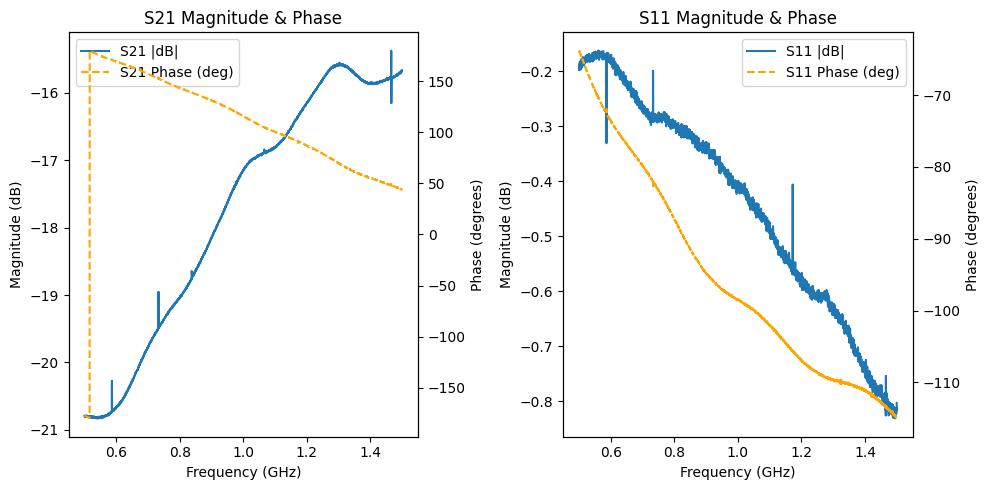

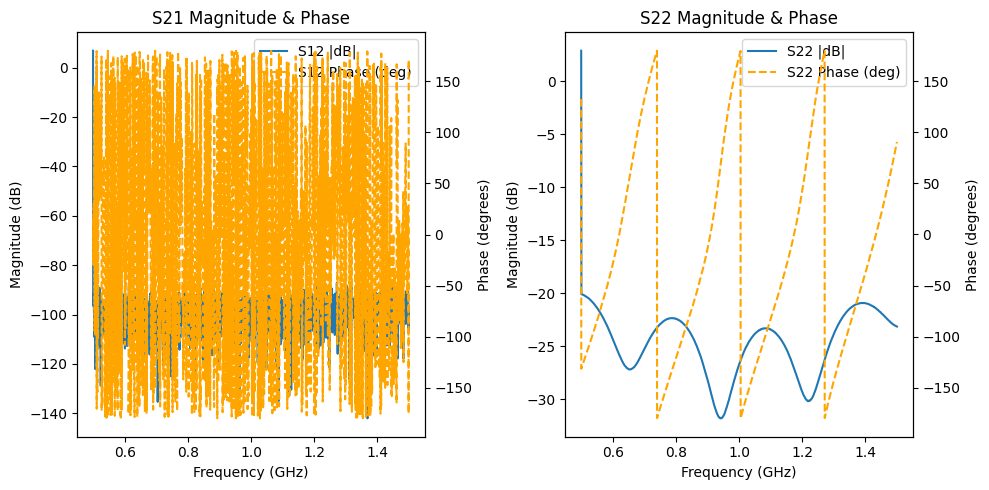

In [11]:

# Load the S-parameter file (Touchstone format).
# Adjust the path/filename as needed:
filename = "data/double_coax_calib_S11_S21_v0.s2p"
show_plot(filename, title_through="S21", title_ret = "S11")
filename = "data/double_coax_calib_S22_S12_v0.s2p"
show_plot(filename, title_through="S12", title_ret = "S22")

### Observation
- It seems like there is no gain whatsoever.
	- perhaps an open circuit got introduced somewhere? Or maybe the transistor is not operating in its linear region?
### Checking DC Operating point
- Check whether transistors are operating in linear mode
	- Vb is smaller than Vc for every case, so the transistor isn't in saturation.

In [15]:
### Checking DC Operating point (U3)
DC_VBase_U3 = 1.12  		#! SIM VALUE: 1.23 V
DC_VEmitter_U3 = 0.68		#! SIM VALUE: 0.436 V
DC_VCollector_U3 = 2.04		#! SIM VALUE: 3.15 V
DC_IEmitter_U3 = DC_VCollector_U3 / 47

print(f"VBE - U3 {DC_VBase_U3-DC_VEmitter_U3:.2f} V")
print(f"VCE - U3 {DC_VCollector_U3-DC_VEmitter_U3:.2f} V")
print(f"IE  - U3 {DC_IEmitter_U3*1000:.2f} mA")

VBE - U3 0.44 V
VCE - U3 1.36 V
IE  - U3 43.40 mA


### Next steps
- Take a new board, simply put a soldering bridge instead Z16 and check if there's any gain.
	- If there is something is probably wrong with your previous soldering
	- If there isn't then there might be something wrong your biasing circuit.